Montecarlo is a method of forecasting stockprice and risk. We'll use our own defined formula with two components: stochastic simulation and deterministic drift component.

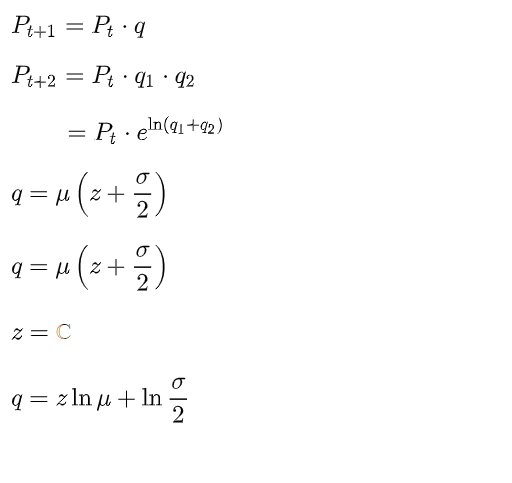


Where q is a percent of change, mu is the mean logarithimic return of the asset, z is a random process and sigma/2 is the drift. This equation qives us a stochastic price for tomorrow, but we want to forecast deeper in to the future. Therefore we modify this equation by taking the natural logarithm of mu, beacause the product of logartihms is equal to the sum of the logarithms. This simplifies the process.

Model asumes returns follow a Gaussian distribution

In [121]:
#imports
import yfinance as yf
import numpy as np
import random
import datetime as datetime
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scipy
from scipy.stats import norm


In [110]:
##defining montecarlo function


def montecarlonumpy(itera=1000,mu=0.01,walks=252,p0=1,sigma=0.01):
    
    b=pd.date_range(start=datetime.datetime.today()+datetime.timedelta(days = 1),end=datetime.datetime.today()+datetime.timedelta(days = walks),freq='D')

    drift=np.log(sigma/2*(mu+1))
    mu=np.log(mu+1)

    logreturns=pd.DataFrame(np.random.uniform(low=-1, high=1, size=(walks,itera+1))*mu*drift)


    logreturns=logreturns.cumsum()

    returns=logreturns.apply(lambda x: np.exp(x)*p0)
    returns['date']=b.date
    returns.set_index('date', inplace=True)
    
    return returns

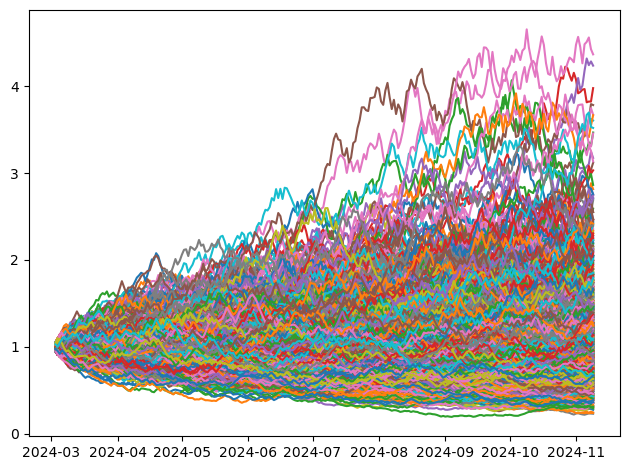

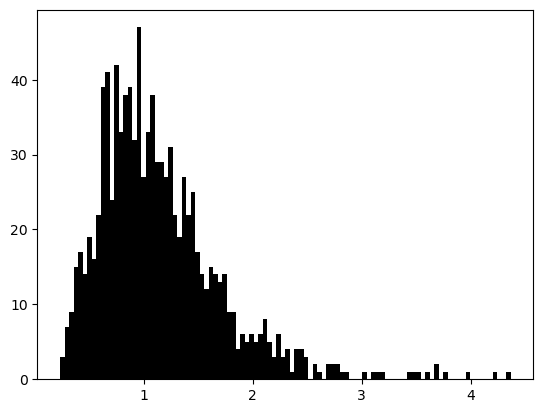

most probable price 1.1443429894149684 with standard deviation of  0.5738694433245378


In [125]:
# graph examples

#graph the montecarlo process

returns=montecarlonumpy(itera=1000,mu=0.01,walks=252,p0=1,sigma=0.01)

plt.plot(returns)
plt.tight_layout()
plt.show()


# graph the log normal distribution of prices

final_results=[]

for column in returns:
        final_results.append(returns[column].iloc[-1])
            
plt.hist(final_results,bins=100,color='k')
plt.show()


# forecast the price

std=np.std(final_results)
u=np.mean(final_results)

print('most probable price', u,'with standard deviation of ',std)
